In [30]:
import os.path

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


In [33]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          'figure.figsize': (7, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13}
pylab.rcParams.update(params)

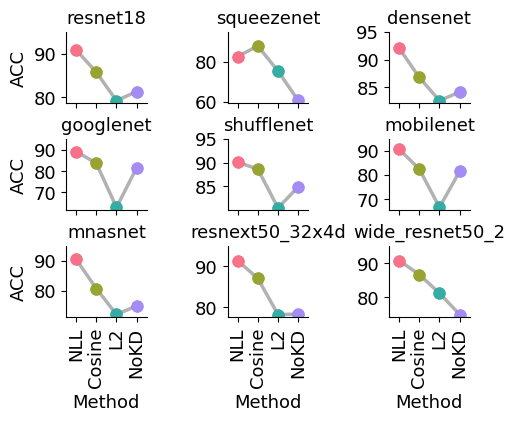

In [20]:
df = pd.read_csv("vision_table_full.csv")

id_vars = ["Method", "Model"]
value_vars = [d for d in df.columns if d not in id_vars]

df = df.melt(id_vars=id_vars, value_vars=value_vars, var_name="Dataset", value_name="ACC")

order= ["NLL", "Cosine", "L2", "NoKD"]

g = sns.catplot(
    data=df,
    x="Method",
    y="ACC",
    hue="Method",
    kind="point",
    palette="husl",
    col = "Model",
    sharey=False,
    height=1.3,
    aspect = 1.3,
    legend=False,
    col_wrap=3,
    order=order,
    hue_order=order,
    errorbar = None
)
g.map(sns.lineplot, "Method", "ACC", errorbar=None, color="black", alpha = 0.3, linewidth=2.5,legend=False)
g.map(sns.pointplot, "Method", "ACC", "Method", palette="husl", errorbar=None, alpha = 1, legend=False,
    order=order,
    hue_order=order,)


g.set_titles(col_template="{col_name}")

g.tick_params(axis = 'x',rotation=90)
g.tick_params(axis = 'y', labelsize=8)

g.figure.subplots_adjust(wspace=1.0, hspace=0.5)

axes = g.axes.flatten()
for i,d in enumerate(df.Model.unique()):
    ax = axes[i]
    df_dataset = df[df["Model"] == d]
    ax.set_ylim(top = 95)
    ax.tick_params(axis='both', which='major', labelsize=13)
plt.savefig("vision_baseline_comp.pdf", bbox_inches='tight')

/tmp/ipykernel_1064192/418537139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(df, x = "Teacher", y = "ACC", palette="husl", errorbar=None, order=labels)
/tmp/ipykernel_1064192/418537139.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


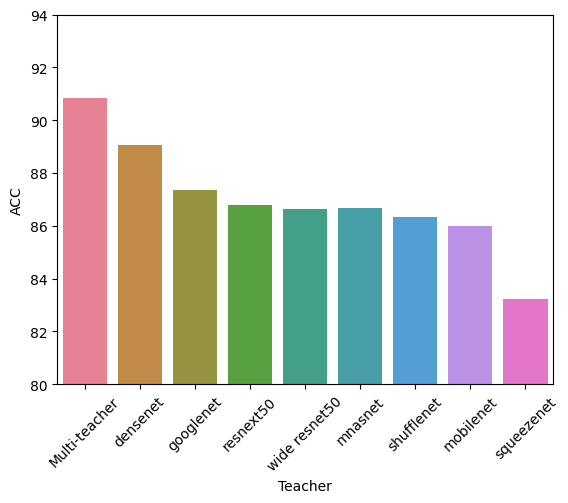

In [2]:
df = pd.read_csv("vision_fig1.csv")
labels = ["Multi-teacher", "densenet" , "googlenet", "resnext50_32x4d", "wide_resnet50_2", "mnasnet", "shufflenet", "mobilenet", "squeezenet"]
ax = sns.barplot(df, x = "Teacher", y = "ACC", palette="husl", errorbar=None, order=labels)
ax.set_ylim(bottom = 80, top = 94)
labels = ["Multi-teacher", "densenet" , "googlenet", "resnext50", "wide resnet50", "mnasnet", "shufflenet", "mobilenet", "squeezenet"]
ax.set_xticklabels(labels, rotation=45)
plt.savefig("vision_single_teacher.pdf", bbox_inches='tight')


In [3]:
df_sg = df

/tmp/ipykernel_1064192/509489656.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
/tmp/ipykernel_1064192/509489656.py:1: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  g = sns.catplot(


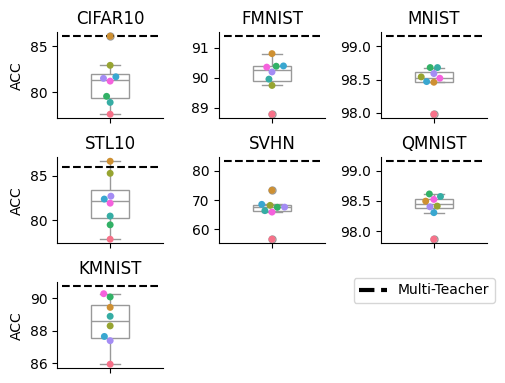

In [36]:
g = sns.catplot(
    data=df_sg[df_sg.Teacher != "Multi-teacher"],
    y="ACC",
    kind="box",
    palette=['white', 'grey'],
    col = "Task",
    sharey=False,
    height=1.3,
    aspect = 1.3,
    legend=False,
    col_wrap=3,
    errorbar=None,
    legend_out = True,
)
g.map_dataframe(sns.swarmplot, y="ACC", hue="Teacher", palette="husl", alpha = 1, legend=False)

for task,ax in zip(df_sg.Task.unique(), g.axes.flatten()):
    ax.set_title(task)
    ax.hlines(df_sg[
        (df_sg.Task == task) & (df_sg.Teacher == "Multi-teacher")
  ].ACC.mean(), -1, 1, color="black", linestyle="--")
colors = ['black']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors]
labels = ['Multi-Teacher']
g.axes.flatten()[-1].legend(lines, labels, bbox_to_anchor=(1.0,0.3),\
    bbox_transform=plt.gcf().transFigure)

/export/livia/home/vision/Bkarimian/miniconda3/envs/env/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/export/livia/home/vision/Bkarimian/miniconda3/envs/env/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


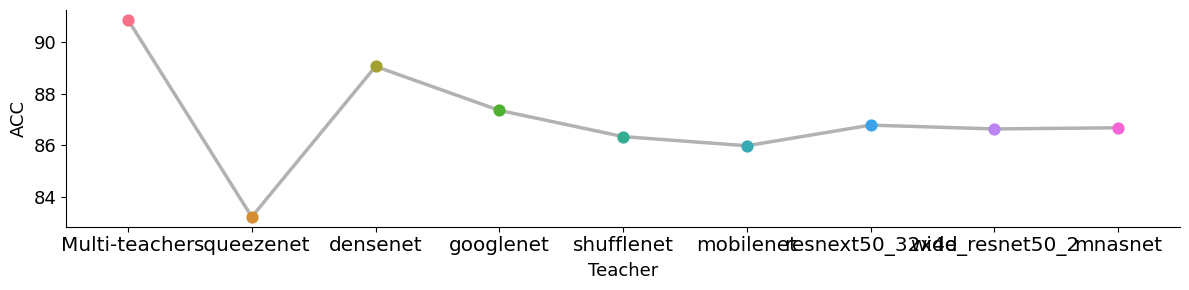

In [21]:
df = pd.read_csv("vision_fig1.csv")
g = sns.FacetGrid(df, aspect = 4)
g.map(sns.lineplot, data = df, x = "Teacher", y = "ACC", errorbar=None, color="black", alpha = 0.3, linewidth=2.5,legend=False)
g.map(sns.pointplot, data = df,x="Teacher", y="ACC", errorbar=None, palette="husl", alpha = 1, legend=False)
plt.savefig("vision_single_teacher.pdf", bbox_inches='tight')
